In [24]:
import numpy as np
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
%matplotlib inline

In [25]:
df = pd.read_csv('insurance.csv')

In [26]:
df.head()

,age,sex,bmi,children,smoker,region,charges
0,19,female,27.900,0,yes,southwest,16884.92400
1,18,male,33.770,1,no,southeast,1725.55230
2,28,male,33.000,3,no,southeast,4449.46200
3,33,male,22.705,0,no,northwest,21984.47061
4,32,male,28.880,0,no,northwest,3866.85520


In [27]:
df.describe(include='all')

,age,sex,bmi,children,smoker,region,charges
count,1338.000000,1338,1338.000000,1338.000000,1338,1338,1338.000000
unique,NaN,2,NaN,NaN,2,4,NaN
top,NaN,male,NaN,NaN,no,southeast,NaN
freq,NaN,676,NaN,NaN,1064,364,NaN
mean,39.207025,NaN,30.663397,1.094918,NaN,NaN,13270.422265
std,14.049960,NaN,6.098187,1.205493,NaN,NaN,12110.011237
min,18.000000,NaN,15.960000,0.000000,NaN,NaN,1121.873900
25%,27.000000,NaN,26.296250,0.000000,NaN,NaN,4740.287150
50%,39.000000,NaN,30.400000,1.000000,NaN,NaN,9382.033000
75%,51.000000,NaN,34.693750,2.000000,NaN,NaN,16639.912515


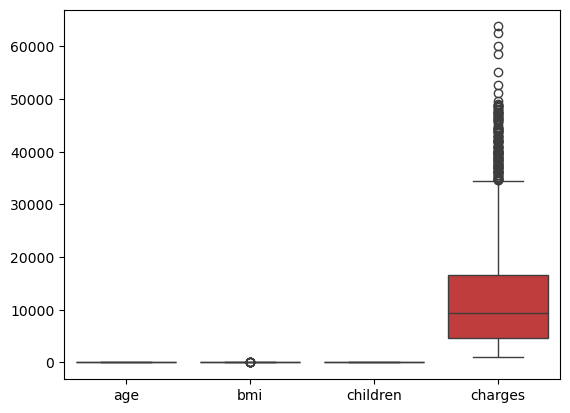

In [28]:
sns.boxplot(data=df)
plt.show()
# Not suitable as the value of charges is very high for other categories to show up

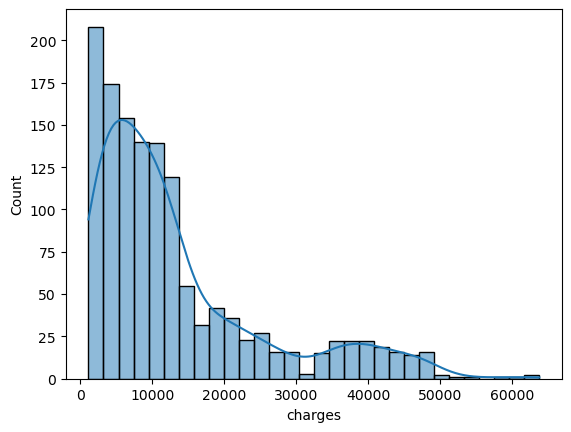

In [29]:
sns.histplot(data=df,x='charges',kde=True)
plt.show()

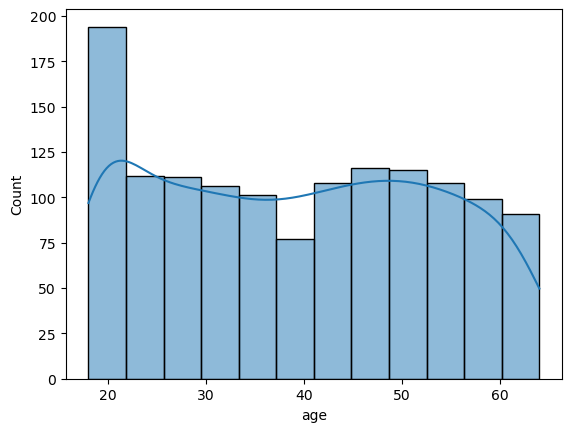

In [30]:
sns.histplot(data=df,x='age',kde=True)
plt.show()
# Its called Uniform distribution (Not Skewed or Symmetrical)

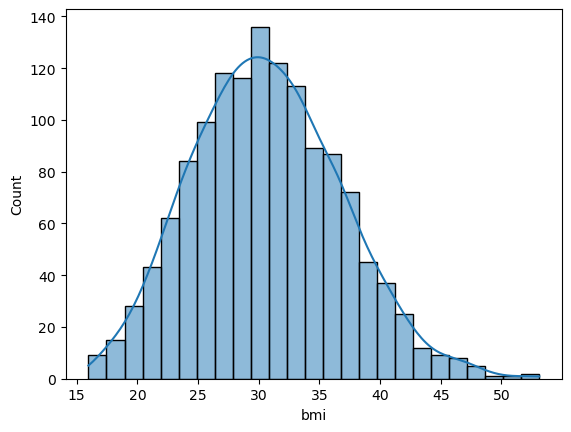

In [31]:
sns.histplot(data=df,x='bmi',kde=True)
plt.show()

In [32]:
df['charges'].skew()

1.5158796580240388

In [33]:
df['bmi'].skew()

0.2840471105987448

In [34]:
df['age'].skew()

0.05567251565299186

In [35]:
# If Value >1, Data is Highly Skewed
# If Value <0.5, Data is Symmetrical
# Between 0.5 and 1, Moderately Skewed

In [36]:
df['charges'].kurtosis() # Leptokurtic

1.6062986532967907

In [37]:
df['bmi'].kurtosis()  # Mesokurtic

-0.05073153135467834

In [38]:
df['age'].kurtosis() # Platykurtic

-1.2450876526418673

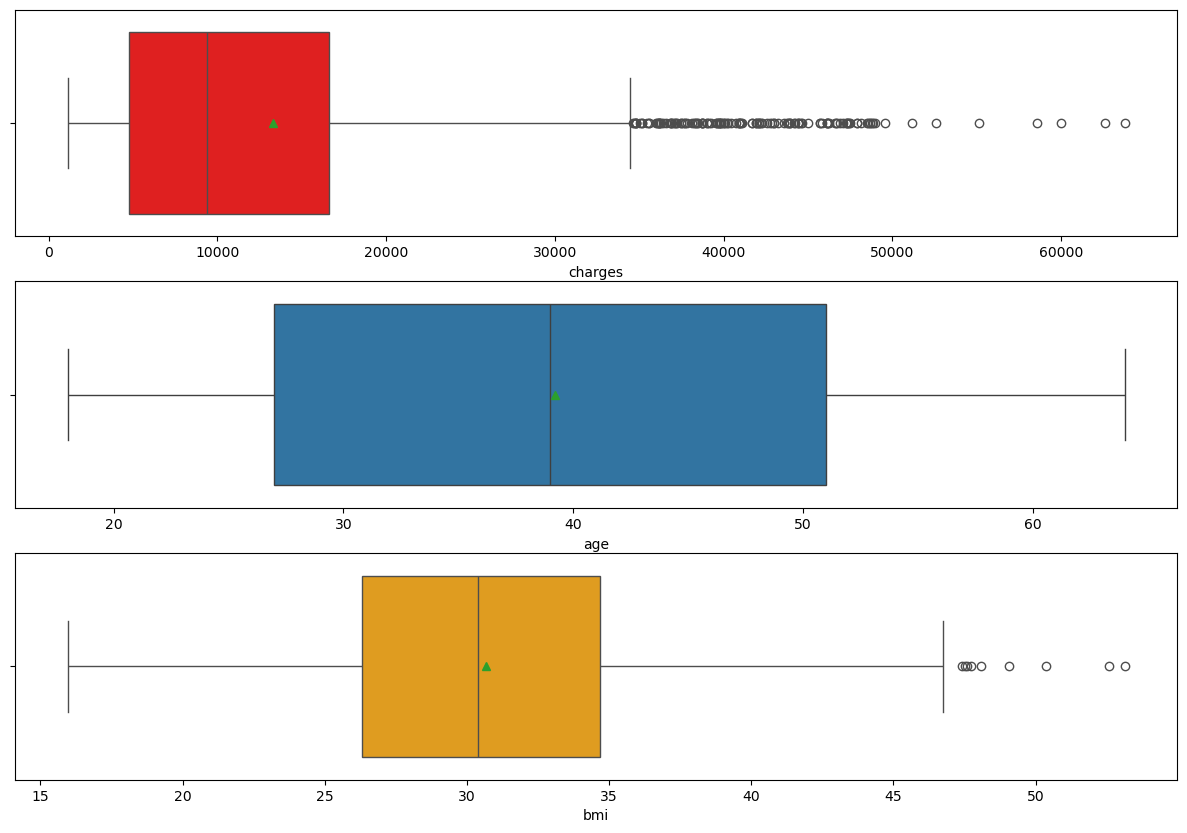

In [39]:
plt.figure(figsize=[15,10])
plt.subplot(3,1,1)
sns.boxplot(data=df,x='charges',showmeans=True,color='red')
plt.subplot(3,1,2)
sns.boxplot(data=df,x='age',showmeans=True)
plt.subplot(3,1,3)
sns.boxplot(data=df,x='bmi',showmeans=True,color='orange')
plt.show()

In [40]:
# Bivariate analysis

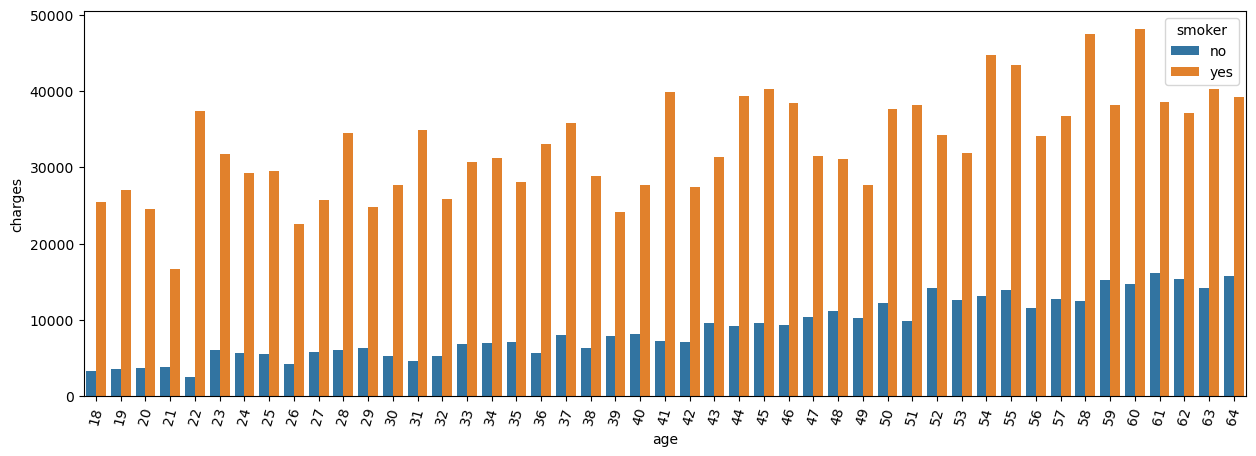

In [41]:
plt.figure(figsize=[15,5])
sns.barplot(data=df,x='age',y='charges',hue='smoker',errorbar=None)
plt.xticks(rotation=75)
plt.show()

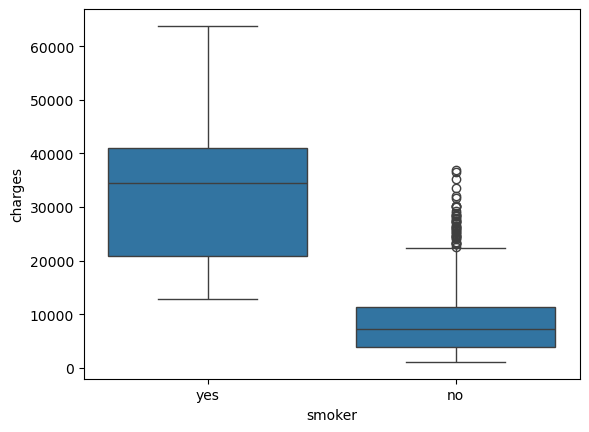

In [42]:
sns.boxplot(data=df,x='smoker',y='charges')
plt.show()

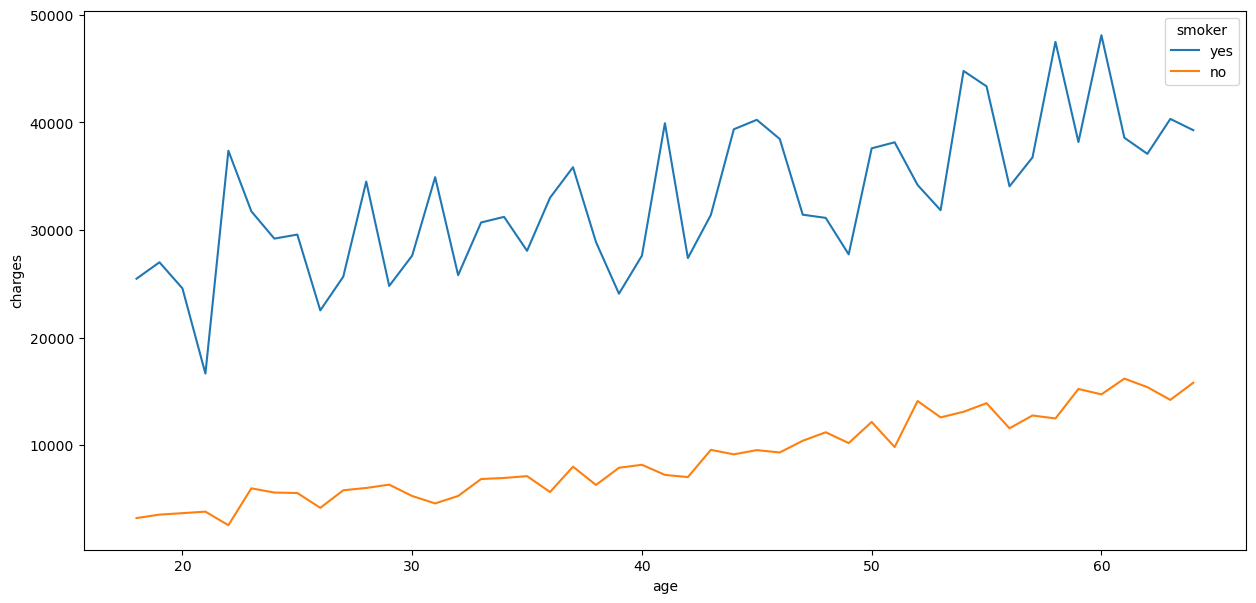

In [43]:
plt.figure(figsize=[15,7])
sns.lineplot(data=df,x='age',y='charges',errorbar=None,hue='smoker')
plt.show()

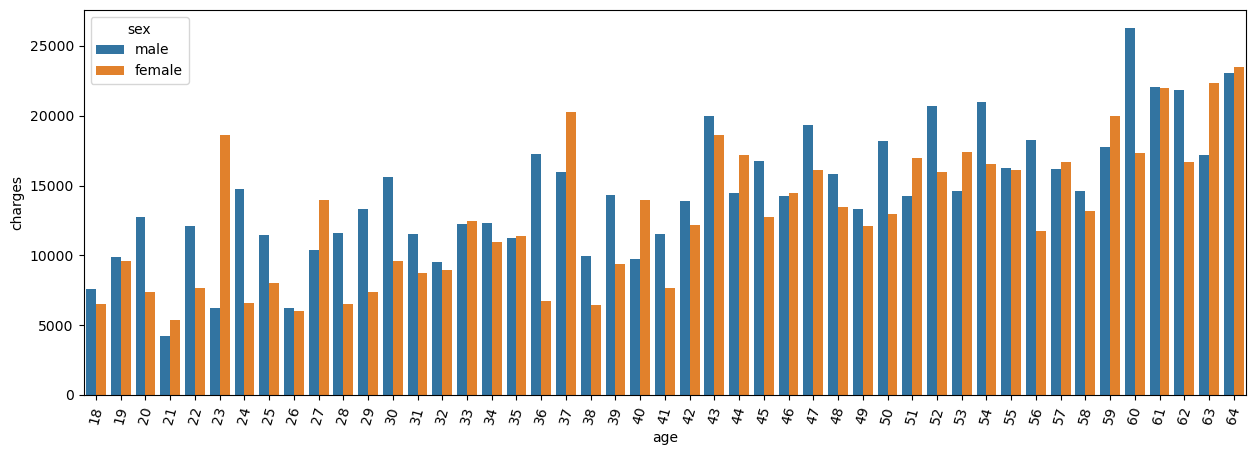

In [44]:
plt.figure(figsize=[15,5])
sns.barplot(data=df,x='age',y='charges',hue='sex',errorbar=None)
plt.xticks(rotation=75)
plt.show()

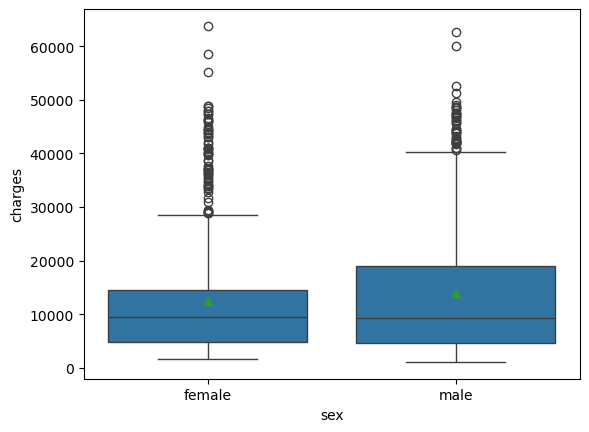

In [45]:
sns.boxplot(data=df,x='sex',y='charges',showmeans=True)
plt.show()

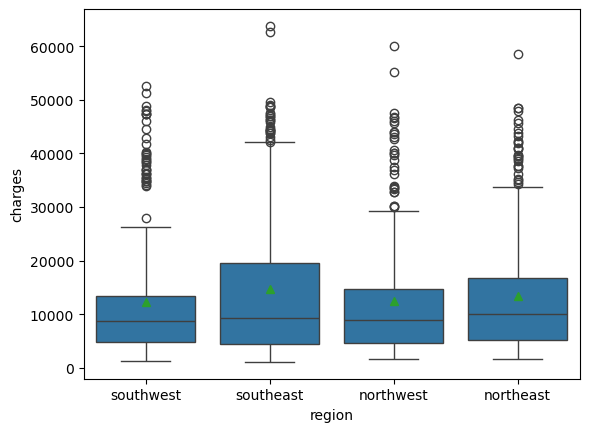

In [46]:
sns.boxplot(data=df,x='region',y='charges',showmeans=True)
plt.show()

In [47]:
df.head(1)

,age,sex,bmi,children,smoker,region,charges
0,19,female,27.9,0,yes,southwest,16884.924


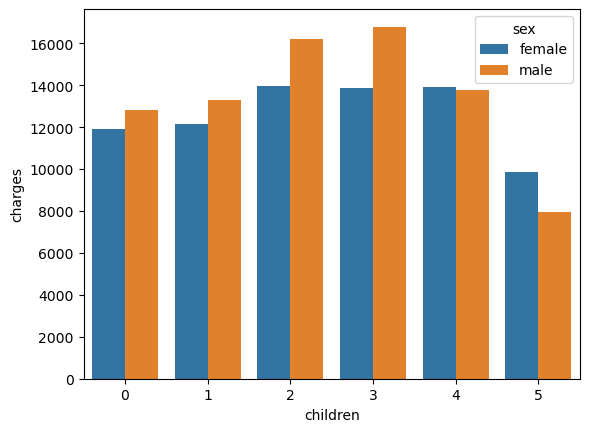

In [48]:
sns.barplot(data=df,x='children',y='charges',errorbar=None,hue='sex')
plt.show()

In [49]:
# Transforming BMI numbers into categories: Two Methods

# METHOD 1:- 

# def bmi_status(bmi):
#     if bmi< 18.5:
#         return 'Underweight'
#     elif bmi < 25:
#         return 'Normal weight'
#     elif bmi < 30:
#         return 'Overweight'
#     elif bmi < 35:
#         return 'Obese I'
#     elif bmi < 40:
#         return 'Obese II'
#     else:
#         return 'Obese III'
# df['bmi_status'] = df['bmi'].apply(bmi_status)

In [50]:
# METHOD 2:-

bins = [0, 18.5, 25, 30, 35, 40, float('inf')]
labels = ['Underweight', 'Normal weight', 'Overweight', 'Obese I', 'Obese II', 'Obese III']
df['bmi_status'] = pd.cut(df['bmi'], bins=bins, labels=labels)

In [51]:
df.head(1)

,age,sex,bmi,children,smoker,region,charges,bmi_status
0,19,female,27.9,0,yes,southwest,16884.924,Overweight


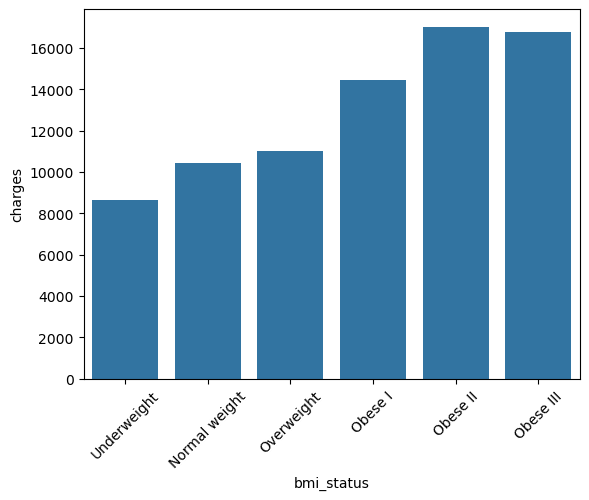

In [52]:
sns.barplot(data=df,x='bmi_status',y='charges',errorbar=None)
plt.xticks(rotation=45)
plt.show()

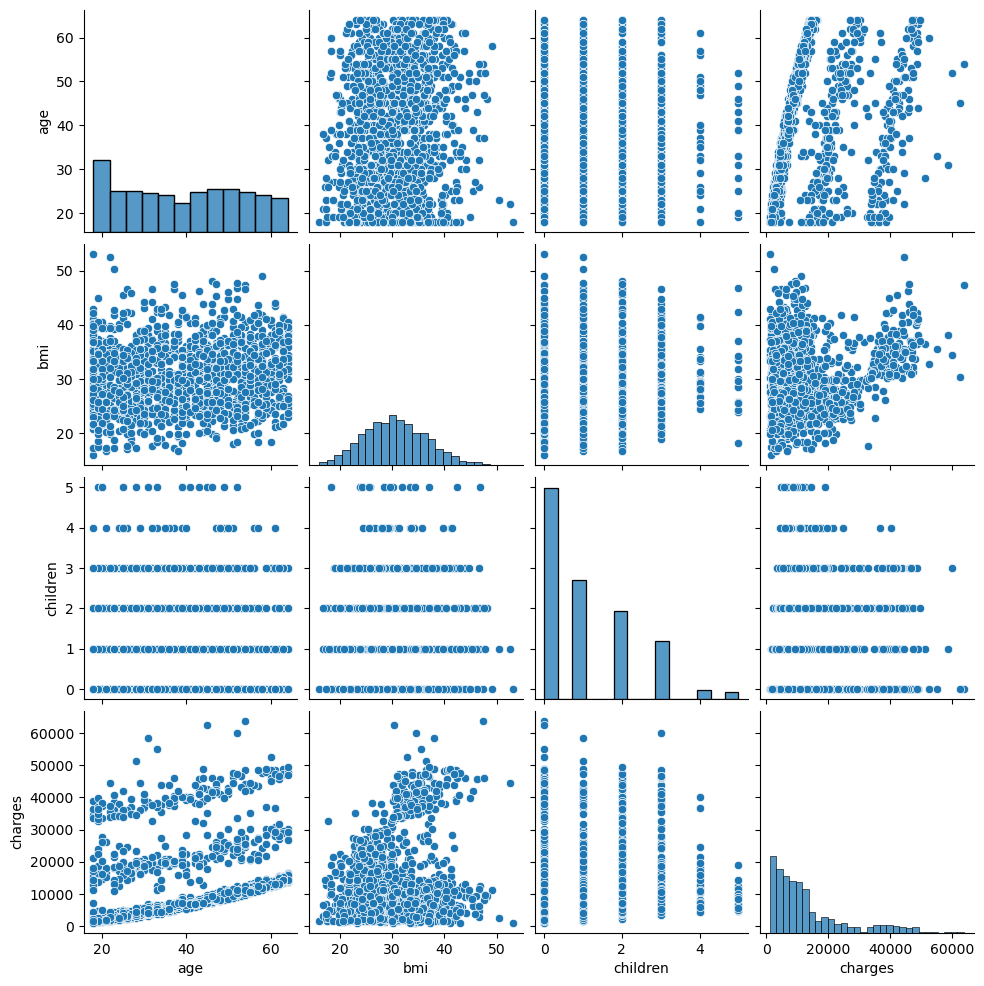

In [53]:
sns.pairplot(data=df)
plt.show()

In [54]:
df.cov(numeric_only=True)

,age,bmi,children,charges
age,197.401387,9.362337,0.719303,5.087480e+04
bmi,9.362337,37.187884,0.093795,1.464730e+04
children,0.719303,0.093795,1.453213,9.926742e+02
charges,50874.802298,14647.304426,992.674197,1.466524e+08


In [55]:
correlation=df.corr(numeric_only=True)
correlation

,age,bmi,children,charges
age,1.000000,0.109272,0.042469,0.299008
bmi,0.109272,1.000000,0.012759,0.198341
children,0.042469,0.012759,1.000000,0.067998
charges,0.299008,0.198341,0.067998,1.000000


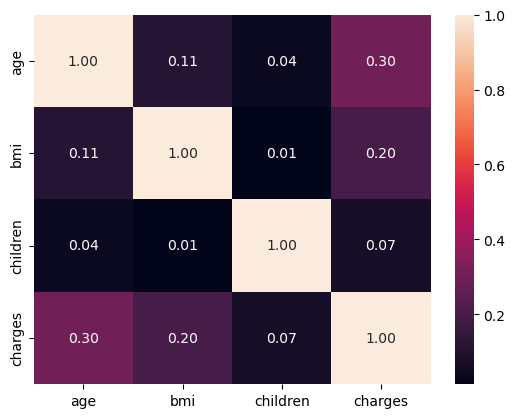

In [56]:
sns.heatmap(correlation,annot=True,fmt='.2f')
plt.show()

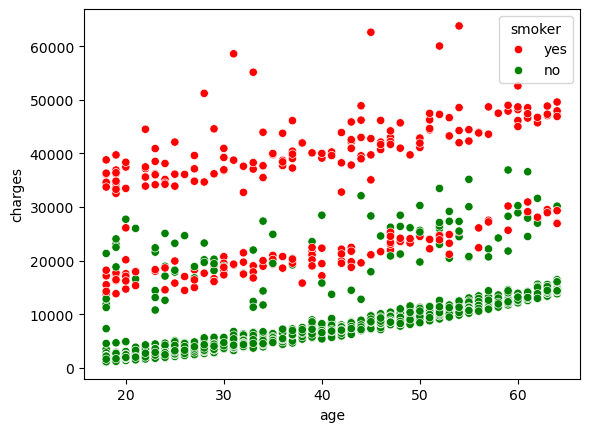

In [57]:
sns.scatterplot(data=df,x='age',y='charges',hue='smoker',palette=['red','green'])
plt.show()

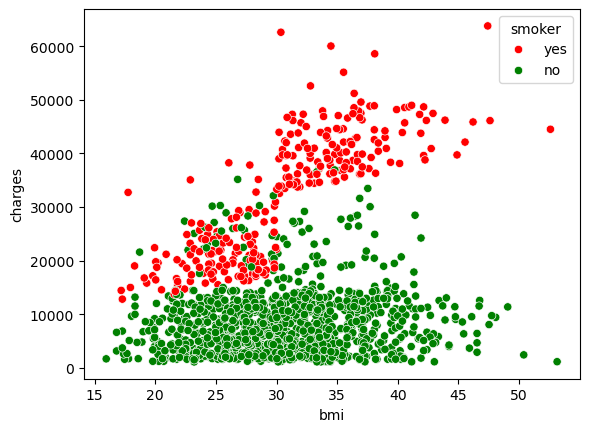

In [58]:
sns.scatterplot(data=df,x='bmi',y='charges',hue='smoker',palette=['red','green'])
plt.show()

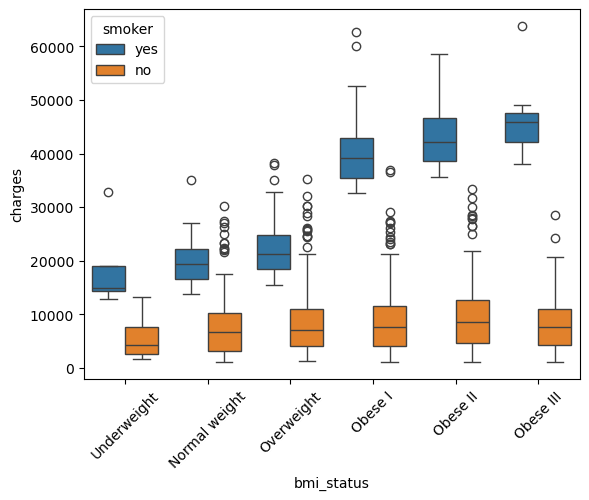

In [59]:
sns.boxplot(data=df,x='bmi_status',y='charges',hue='smoker')
plt.xticks(rotation=45)
plt.show()

# Machine Learning

In [98]:
df.corr(numeric_only=True)

,age,bmi,children,charges
age,1.000000,0.109272,0.042469,0.299008
bmi,0.109272,1.000000,0.012759,0.198341
children,0.042469,0.012759,1.000000,0.067998
charges,0.299008,0.198341,0.067998,1.000000


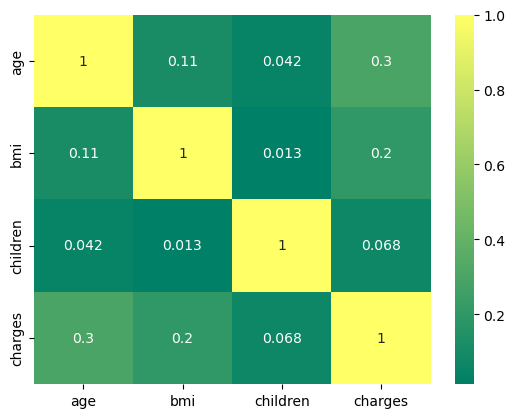

In [104]:
sns.heatmap(df.corr(numeric_only=True),annot=True,cmap='summer')
plt.show()

In [118]:
df1=df.copy()

In [120]:
df1.head(1)

,age,sex,bmi,children,smoker,region,charges,bmi_status
0,19,female,27.9,0,yes,southwest,16884.924,Overweight


In [122]:
df1.drop('bmi_status',axis=1,inplace=True)

In [124]:
df1.head(1)

,age,sex,bmi,children,smoker,region,charges
0,19,female,27.9,0,yes,southwest,16884.924


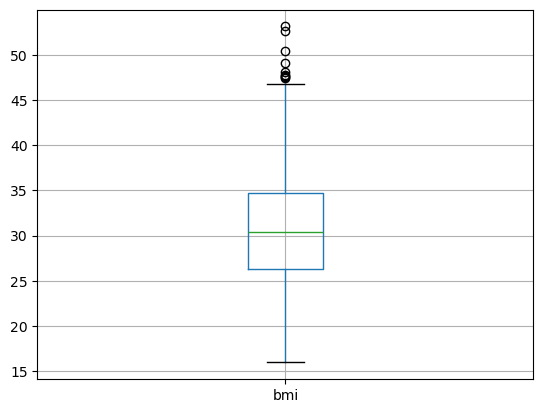

In [134]:
df1.boxplot('bmi')
plt.show()

In [136]:
def remove_outliers(col):
    sorted(col)
    Q1,Q3 = col.quantile([0.25,0.75])
    IQR = Q3-Q1
    ur_whisk = Q3+1.5*IQR
    lr_whisk = Q1-1.5*IQR
    return col.clip(lr_whisk, ur_whisk)

In [142]:
df1['bmi'] = remove_outliers(df1['bmi'])

In [146]:
from scipy.stats import zscore

In [148]:
df1.head(1)

,age,sex,bmi,children,smoker,region,charges
0,19,female,27.9,0,yes,southwest,16884.924


In [156]:
df1[['bmi','age']] = df1[['bmi','age']].apply(zscore)

In [168]:
df1.head(2)

,age,sex,bmi,children,smoker,region,charges
0,-1.438764,0,-0.454201,0,1,3,16884.9240
1,-1.509965,1,0.515300,1,0,2,1725.5523


In [162]:
df1['sex']=pd.Categorical(df1['sex']).codes
df1['children']=pd.Categorical(df1['children']).codes
df1['region']=pd.Categorical(df1['region']).codes
df1['smoker']=pd.Categorical(df1['smoker']).codes

In [164]:
df1.head()

,age,sex,bmi,children,smoker,region,charges
0,-1.438764,0,-0.454201,0,1,3,16884.92400
1,-1.509965,1,0.515300,1,0,2,1725.55230
2,-0.797954,1,0.388125,3,0,2,4449.46200
3,-0.441948,1,-1.312218,0,0,1,21984.47061
4,-0.513149,1,-0.292342,0,0,1,3866.85520


In [178]:
X = df1.drop('charges',axis=1)

In [180]:
X.head()

,age,sex,bmi,children,smoker,region
0,-1.438764,0,-0.454201,0,1,3
1,-1.509965,1,0.515300,1,0,2
2,-0.797954,1,0.388125,3,0,2
3,-0.441948,1,-1.312218,0,0,1
4,-0.513149,1,-0.292342,0,0,1


In [184]:
Y = df1[['charges']]

In [186]:
Y.head()

,charges
0,16884.92400
1,1725.55230
2,4449.46200
3,21984.47061
4,3866.85520


In [170]:
from sklearn.model_selection import train_test_split

In [188]:
X_train,X_test,Y_train,Y_test=train_test_split(X,Y,test_size=0.30,random_state=1)

In [192]:
df1.shape

(1338, 7)

In [194]:
X_train.shape

(936, 6)

In [196]:
X_test.shape

(402, 6)

In [198]:
Y_test.shape

(402, 1)

In [200]:
from sklearn.linear_model import LinearRegression

In [202]:
LR_model = LinearRegression()

In [206]:
LR_model.fit(X_train,Y_train)

LinearRegression()

In [208]:
LR_model.score(X_train,Y_train)

0.7544993535572957

In [210]:
LR_model.score(X_test,Y_test)

0.7404969427740155

In [212]:
predict_train = LR_model.predict(X_train)
predict_test = LR_model.predict(X_test)

In [214]:
from sklearn.metrics import mean_squared_error,root_mean_squared_error

In [218]:
RMSE = root_mean_squared_error(Y_train,predict_train)
RMSE

6040.295690893535

In [220]:
RMSE_test = root_mean_squared_error(Y_test,predict_test)
RMSE_test 

6064.31446102911

In [222]:
LR_model.coef_[0]

array([ 3533.45548896,  -272.59338295,  1938.64456274,   349.55005191,
       24047.56094795,  -319.32901425])

In [224]:
LR_model.intercept_

array([8654.64006763])

In [226]:
for idx,col_name in enumerate(X.columns):
    print(f'The coefficient of {col_name} is {LR_model.coef_[0][idx]}')

The coefficient of age is 3533.4554889645115
The coefficient of sex is -272.5933829527443
The coefficient of bmi is 1938.6445627375022
The coefficient of children is 349.55005190816223
The coefficient of smoker is 24047.56094794934
The coefficient of region is -319.3290142509676


In [228]:
import statsmodels.formula.api as smf

In [230]:
data_train=pd.concat([X_train,Y_train],axis=1)

In [234]:
data_train.head()

,age,sex,bmi,children,smoker,region,charges
744,0.768473,1,-0.700292,0,0,1,8827.2099
363,-1.296362,0,-0.701944,1,0,3,2597.7790
10,-1.011557,1,-0.731673,0,0,0,2721.3208
970,0.768473,0,-0.411259,3,0,2,10702.6424
634,0.839674,1,1.494710,1,0,3,9391.3460


In [232]:
data_test=pd.concat([X_test,Y_test],axis=1)

In [236]:
formula= 'charges ~ age+sex+bmi+children+smoker+region'

In [238]:
ols_model=smf.ols(formula,data_train)

In [240]:
Linear_model=ols_model.fit()

In [242]:
print(Linear_model.summary())

                            OLS Regression Results                            
Dep. Variable:                charges   R-squared:                       0.754
Model:                            OLS   Adj. R-squared:                  0.753
Method:                 Least Squares   F-statistic:                     475.9
Date:                Mon, 02 Jun 2025   Prob (F-statistic):          2.96e-279
Time:                        17:03:36   Log-Likelihood:                -9477.1
No. Observations:                 936   AIC:                         1.897e+04
Df Residuals:                     929   BIC:                         1.900e+04
Df Model:                           6                                         
Covariance Type:            nonrobust                                         
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
Intercept   8654.6401    443.529     19.513      0.0

In [244]:
# H0: There is no relation with the y variable
# Ha: There is relation
# Significance is at 5%

In [248]:
0.05>0.493

False

In [250]:
formula2= 'charges ~ age+bmi+children+smoker'
ols_model2=smf.ols(formula2,data_train)
Linear_model2=ols_model2.fit()
print(Linear_model2.summary())

                            OLS Regression Results                            
Dep. Variable:                charges   R-squared:                       0.754
Model:                            OLS   Adj. R-squared:                  0.753
Method:                 Least Squares   F-statistic:                     711.7
Date:                Mon, 02 Jun 2025   Prob (F-statistic):          2.44e-281
Time:                        17:12:20   Log-Likelihood:                -9478.9
No. Observations:                 936   AIC:                         1.897e+04
Df Residuals:                     931   BIC:                         1.899e+04
Df Model:                           4                                         
Covariance Type:            nonrobust                                         
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
Intercept   8037.1396    286.388     28.064      0.0